# Macro Research: Evaluating Economic States on Equity Performance

By Ana Carolina Macanhan and Korbinian Gabriel with support by Tim Gajewski and the PMC Macro Team (Alvaro Rodriguez, Rodolfo Carrasquinho, Oliver Wittig, Andrea Pimenta and Soraia Silva).


In this book, economic states will be defined and then the performance of the general market will be assessed and predictability analysed.

#### Libraries and Data

In [1]:
# Loading pre-installed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns

import statsmodels.api as sm

In [2]:
# Loading data pipeline
from data_pipeline import get_cleaned_data

In [3]:
# Loading data and resampling it.
X_data, Y_data = get_cleaned_data()
X_data = X_data.resample('M').mean()
Y_data = Y_data.resample('M').mean()
X_data.index = [pd.datetime(x.year, x.month, 1) for x in X_data.index.tolist()]
Y_data.index = [pd.datetime(x.year, x.month, 1) for x in Y_data.index.tolist()]

cpi = pdr.get_data_fred('CPIAUCSL', start='2000-01-01').pct_change()
gdp = pdr.get_data_fred('GDPC1', start = '2000-01-01').pct_change()
#Y_data = Y_data.iloc[:, 1:]

usd = yf.download('DX=F')['Adj Close'].pct_change()
usd.name = 'USD'
usd.fillna(method='ffill', inplace=True)
usd
#USD data starts in 2006

sp500 = yf.download('SP=F')['Adj Close'].pct_change()
sp500.name = 'SP500'
sp500.fillna(method='ffill', inplace=True)

Y_data = pd.concat([Y_data, cpi, gdp], axis = 1)
Y_data = Y_data.iloc[:, 1:]

GDP CURY Index not in dataset
GDP CURY Index not in dataset
GDP CQOQ Index not in dataset
GDP CQOQ Index not in dataset
CPI YOY Index not in dataset
CPI YOY Index not in dataset


<ipython-input-3-d6b2c30ffbb5>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  X_data.index = [pd.datetime(x.year, x.month, 1) for x in X_data.index.tolist()]
<ipython-input-3-d6b2c30ffbb5>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  Y_data.index = [pd.datetime(x.year, x.month, 1) for x in Y_data.index.tolist()]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# for y in Y_data.columns:
#     for x in X_data.columns:
#         plt.figure()
#         plt.scatter(X_data[x], Y_data[y])
#         plt.title(str(x+'+'+y))
#         plt.ylabel(y)
#         plt.xlabel(x)
#         plt.show()

In [5]:
cpi = Y_data['CPIAUCSL'].dropna()

In [6]:
X_data = X_data.iloc[1:-1]

## Exploratory Regressions

In [7]:
mod = sm.OLS(cpi, X_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               CPIAUCSL   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     7.178
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.89e-09
Time:                        14:40:28   Log-Likelihood:                 1174.9
No. Observations:                 261   AIC:                            -2330.
Df Residuals:                     251   BIC:                            -2294.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NFCIINDX Index    -0.0044      0.003     -1.

In [8]:
gdp = Y_data['GDPC1'].fillna(0)

In [9]:
gdp = gdp.iloc[1:-1]

In [10]:
mod = sm.OLS(gdp, X_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GDPC1   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.750
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0783
Time:                        14:40:28   Log-Likelihood:                 885.27
No. Observations:                 261   AIC:                            -1751.
Df Residuals:                     251   BIC:                            -1715.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NFCIINDX Index     0.0102      0.008      1.

In [11]:
#over time, the growth in GDP (x) causes inflation (y)
#OLS(y,x)
mod = sm.OLS(cpi, gdp)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               CPIAUCSL   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.061
Method:                 Least Squares   F-statistic:                              17.90
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                    3.23e-05
Time:                        14:40:28   Log-Likelihood:                          1110.4
No. Observations:                 261   AIC:                                     -2219.
Df Residuals:                     260   BIC:                                     -2215.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Correlation Analysis

In [12]:
cor_cpi = pd.concat([X_data, cpi], axis = 1)

In [13]:
cor_cpi.corr()

,NFCIINDX Index,NFCIADJ Index,VIX Index,CRBQX Index,SPGSCI Index,BCOM Index,BDIY Index,MTIBCHNG Index,GC1 Comdty,USGG5Y5Y Index,CPIAUCSL
NFCIINDX Index,1.000000,0.985877,0.756047,0.064147,0.073372,0.141098,0.168664,NaN,0.059492,-0.065518,-0.280009
NFCIADJ Index,0.985877,1.000000,0.710651,0.111912,0.128731,0.232391,0.270386,NaN,0.057334,-0.006997,-0.232393
VIX Index,0.756047,0.710651,1.000000,-0.206858,-0.191117,-0.089487,-0.032343,NaN,0.047379,-0.193198,-0.319201
CRBQX Index,0.064147,0.111912,-0.206858,1.000000,0.888103,0.216249,0.184116,NaN,-0.022594,0.301121,0.127996
SPGSCI Index,0.073372,0.128731,-0.191117,0.888103,1.000000,0.525696,0.242802,NaN,-0.045502,0.574541,0.126185
BCOM Index,0.141098,0.232391,-0.089487,0.216249,0.525696,1.000000,0.686777,NaN,0.059520,0.749527,0.168958
BDIY Index,0.168664,0.270386,-0.032343,0.184116,0.242802,0.686777,1.000000,NaN,0.081238,0.405347,0.261158
MTIBCHNG Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC1 Comdty,0.059492,0.057334,0.047379,-0.022594,-0.045502,0.059520,0.081238,NaN,1.000000,0.024359,0.076073
USGG5Y5Y Index,-0.065518,-0.006997,-0.193198,0.301121,0.574541,0.749527,0.405347,NaN,0.024359,1.000000,0.118700


### Heat Map Matrix presenting correlation between CPI and different indeces

##### National Financial Conditions Index (NFCI);
##### Cboe Volatility Index (VIX);
##### RefinitivCRB Commodity Equity Index (CRBQX);
##### Bloomberg Commodity Index (BCOM);
##### Baltic Dry Futures (BDIY);
##### US Manufacturing & Trade Inventories Total MoM SA (MTIBCHNG);
##### Gold (NYM $/ozt) Front Month (GC1)
##### 5-year 5-year Forward Inflation Expectation Rate (USGG5Y5Y Index)
##### Consumer Price Index for All Urban Consumers  (CPIAUCSL) 

<AxesSubplot:>

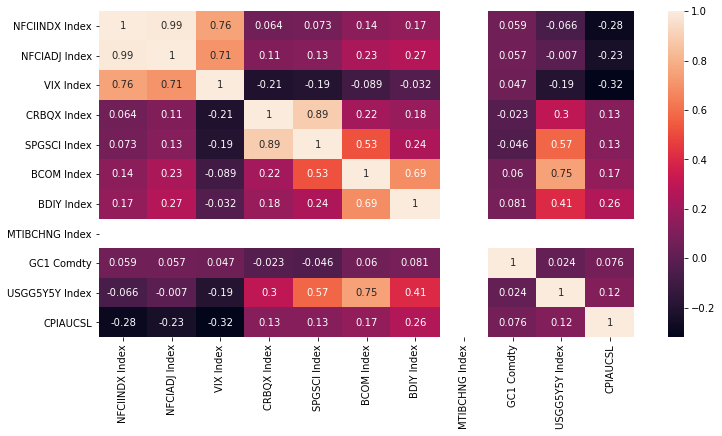

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_cpi.corr(), annot=True)

#### By plotting heatmap of correlations between indices and CPI, we can find that some variables have high correlation (>=0.5) between each other:
##### VIX and NFCIINDEX (0.76), 
##### VIX and NFCIADJ (0.71),
##### BCOM and USGG5Y5Y (0.75),
##### SPGSCI and USGG5Y5Y (0.57),
##### BCOM and BDIY (0.69), 
##### excluding commodity indexes that of course are correlated. 
##### However, most variables have low correlation with CPI. 

### Scatter plot Correlation Matrix 

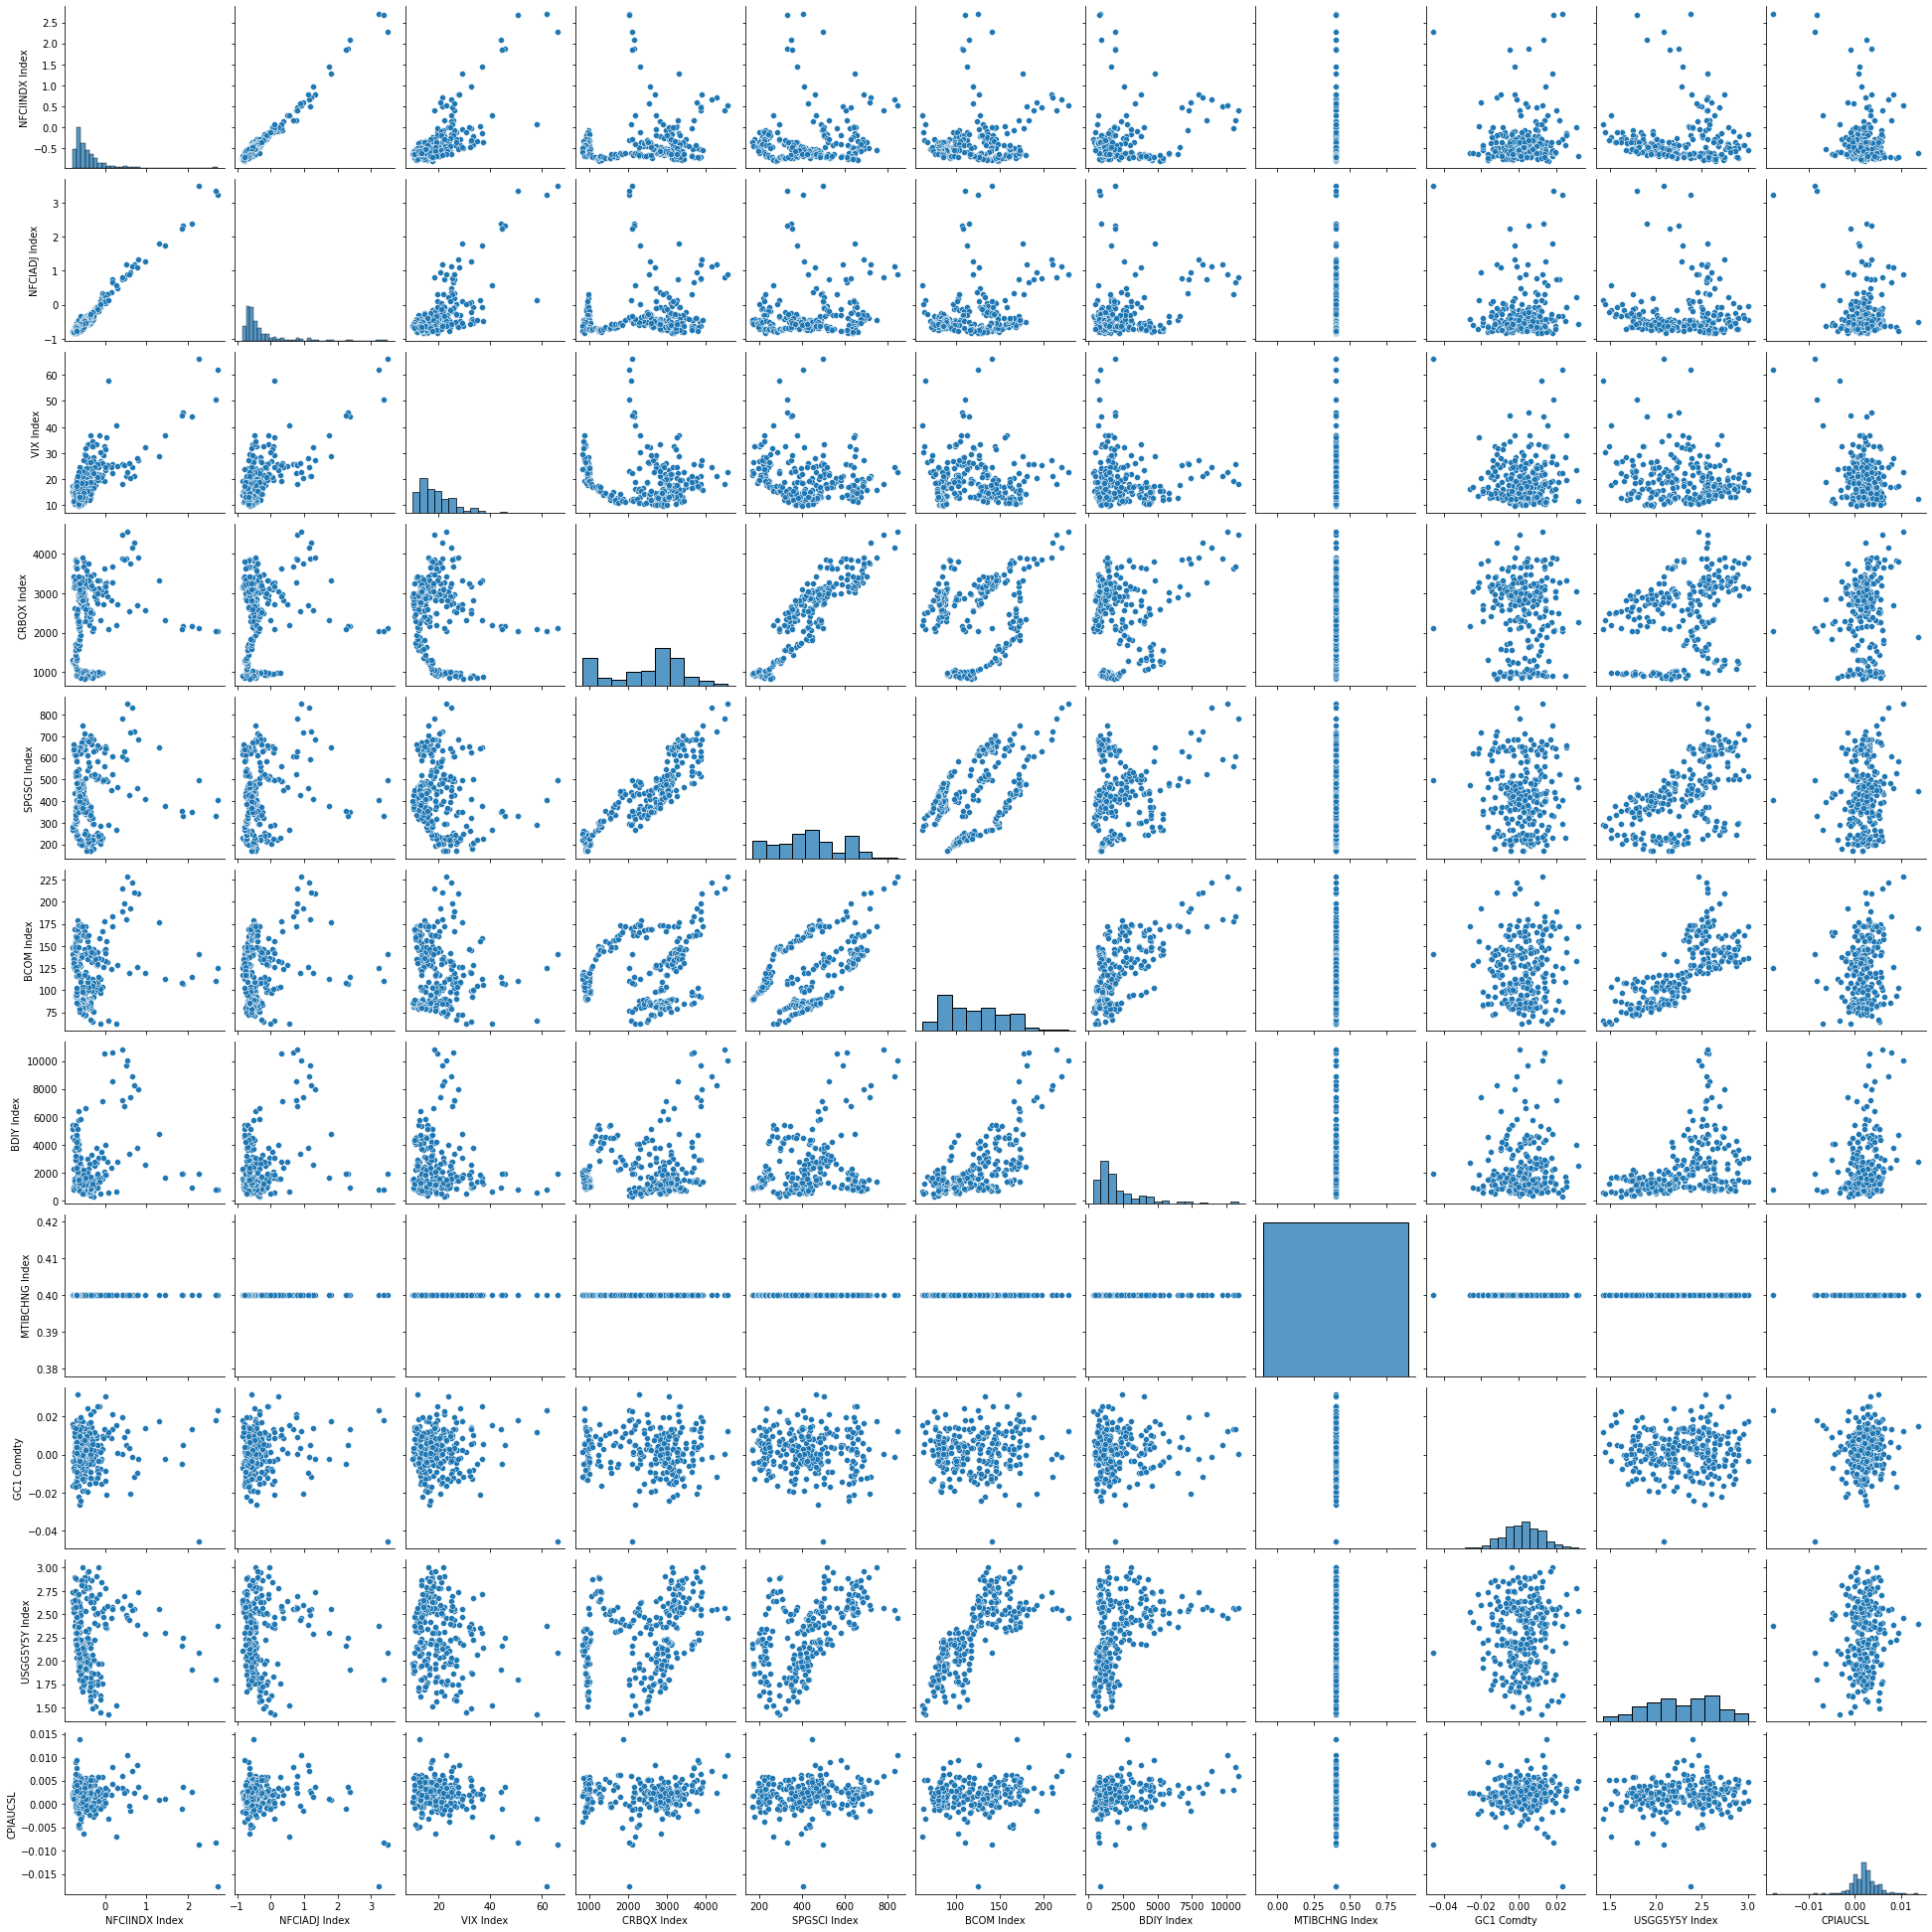

In [15]:
sns.pairplot(cor_cpi)

In [16]:
cor_gdp = pd.concat([X_data, gdp], axis = 1)

### Correlation Analysis between indices + GDP

In [17]:
cor_gdp.corr()

,NFCIINDX Index,NFCIADJ Index,VIX Index,CRBQX Index,SPGSCI Index,BCOM Index,BDIY Index,MTIBCHNG Index,GC1 Comdty,USGG5Y5Y Index,GDPC1
NFCIINDX Index,1.000000,0.985877,0.756047,0.064147,0.073372,0.141098,0.168664,NaN,0.059492,-0.065518,-0.185578
NFCIADJ Index,0.985877,1.000000,0.710651,0.111912,0.128731,0.232391,0.270386,NaN,0.057334,-0.006997,-0.189327
VIX Index,0.756047,0.710651,1.000000,-0.206858,-0.191117,-0.089487,-0.032343,NaN,0.047379,-0.193198,-0.187918
CRBQX Index,0.064147,0.111912,-0.206858,1.000000,0.888103,0.216249,0.184116,NaN,-0.022594,0.301121,-0.000066
SPGSCI Index,0.073372,0.128731,-0.191117,0.888103,1.000000,0.525696,0.242802,NaN,-0.045502,0.574541,0.001683
BCOM Index,0.141098,0.232391,-0.089487,0.216249,0.525696,1.000000,0.686777,NaN,0.059520,0.749527,-0.000188
BDIY Index,0.168664,0.270386,-0.032343,0.184116,0.242802,0.686777,1.000000,NaN,0.081238,0.405347,0.023688
MTIBCHNG Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC1 Comdty,0.059492,0.057334,0.047379,-0.022594,-0.045502,0.059520,0.081238,NaN,1.000000,0.024359,0.059351
USGG5Y5Y Index,-0.065518,-0.006997,-0.193198,0.301121,0.574541,0.749527,0.405347,NaN,0.024359,1.000000,0.048901


### Heat Map Matrix presenting correlation between indeces + GDP

<AxesSubplot:>

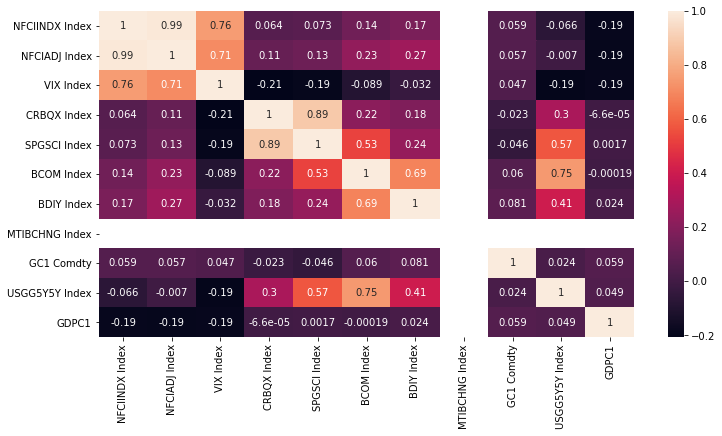

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_gdp.corr(), annot=True)

#### By plotting heatmap of correlations between indices and GDP, we can find again many variables have high correlation (>=0.5) between each other:
##### VIX and NFCIINDEX (0.76), 
##### VIX and NFCIADJ (0.71),
##### BCOM and USGG5Y5Y (0.75),
##### SPGSCI and USGG5Y5Y (0.57),
##### BCOM and BDIY (0.69),
##### excluding commodity indexes that of course are correlated. 
##### However, most variables have low correlation with GDP.

### Scatter plot Correlation Matrix 

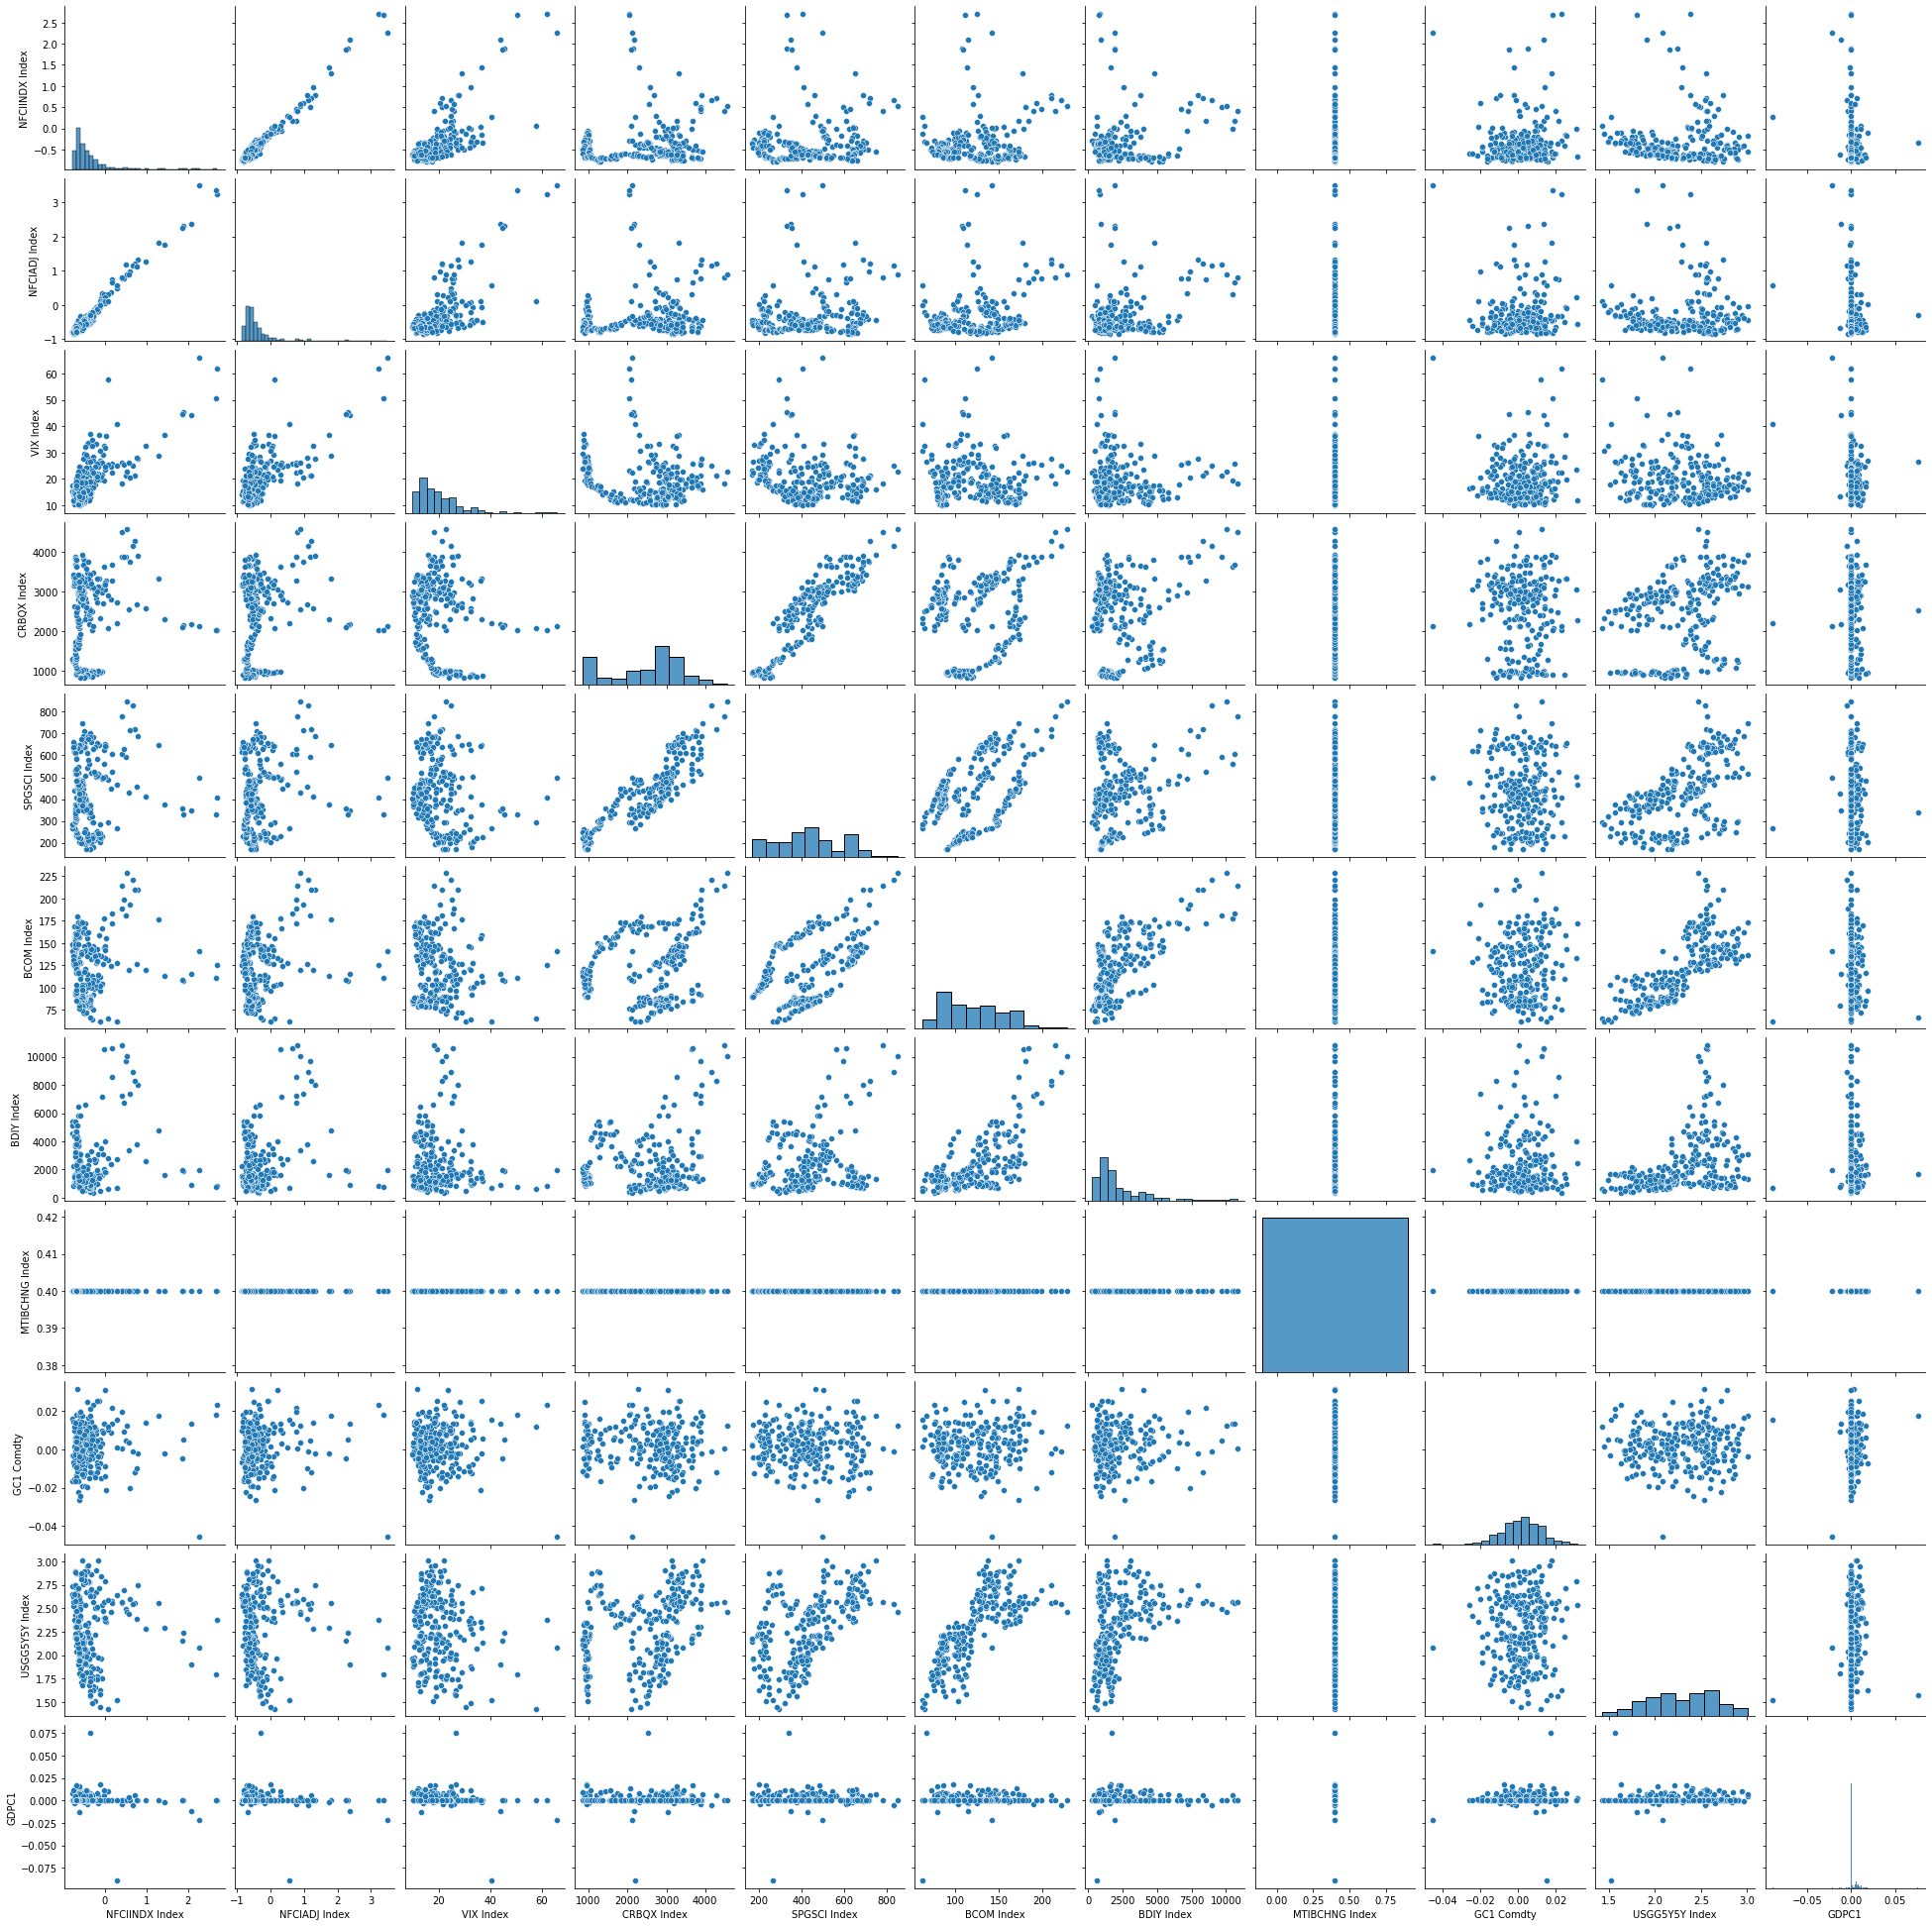

In [19]:
sns.pairplot(cor_gdp)

In [20]:
cor_gdp_cpi = pd.concat([X_data, cpi, gdp], axis = 1)

### Correlation Analysis 

In [21]:
cor_gdp_cpi.corr()

,NFCIINDX Index,NFCIADJ Index,VIX Index,CRBQX Index,SPGSCI Index,BCOM Index,BDIY Index,MTIBCHNG Index,GC1 Comdty,USGG5Y5Y Index,CPIAUCSL,GDPC1
NFCIINDX Index,1.000000,0.985877,0.756047,0.064147,0.073372,0.141098,0.168664,NaN,0.059492,-0.065518,-0.280009,-0.185578
NFCIADJ Index,0.985877,1.000000,0.710651,0.111912,0.128731,0.232391,0.270386,NaN,0.057334,-0.006997,-0.232393,-0.189327
VIX Index,0.756047,0.710651,1.000000,-0.206858,-0.191117,-0.089487,-0.032343,NaN,0.047379,-0.193198,-0.319201,-0.187918
CRBQX Index,0.064147,0.111912,-0.206858,1.000000,0.888103,0.216249,0.184116,NaN,-0.022594,0.301121,0.127996,-0.000066
SPGSCI Index,0.073372,0.128731,-0.191117,0.888103,1.000000,0.525696,0.242802,NaN,-0.045502,0.574541,0.126185,0.001683
BCOM Index,0.141098,0.232391,-0.089487,0.216249,0.525696,1.000000,0.686777,NaN,0.059520,0.749527,0.168958,-0.000188
BDIY Index,0.168664,0.270386,-0.032343,0.184116,0.242802,0.686777,1.000000,NaN,0.081238,0.405347,0.261158,0.023688
MTIBCHNG Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC1 Comdty,0.059492,0.057334,0.047379,-0.022594,-0.045502,0.059520,0.081238,NaN,1.000000,0.024359,0.076073,0.059351
USGG5Y5Y Index,-0.065518,-0.006997,-0.193198,0.301121,0.574541,0.749527,0.405347,NaN,0.024359,1.000000,0.118700,0.048901


### Heat Map Matrix presenting correlation between indeces + GDP + CPI

<AxesSubplot:>

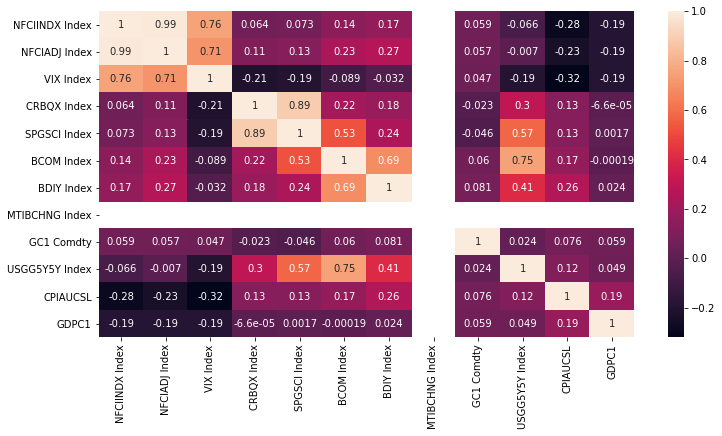

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_gdp_cpi.corr(), annot=True)

##### By plotting heatmap of correlations between indices, GDP, and CPI, we can find again many variables have high correlation (>=0.5) between each other:
##### VIX and NFCIINDEX (0.76), 
##### VIX and NFCIADJ (0.71),
##### BCOM and USGG5Y5Y (0.75),
##### SPGSCI and USGG5Y5Y (0.57),
##### BCOM and BDIY (0.69),
##### excluding commodity indexes that of course are correlated. 
##### However, again most variables have low correlation with GDP and CPI. GDP and CPI have a low correlation. 

###### Pearson Correlation: 
###### Perfect correlation = around 1;
###### High Correlation = >= 0.50 < 1;
###### Moderate Correlation = >=0.30 <=0.49
###### Low Correlation = <=0.29
###### No correlation = 0

### Scatter plot Correlation Matrix  

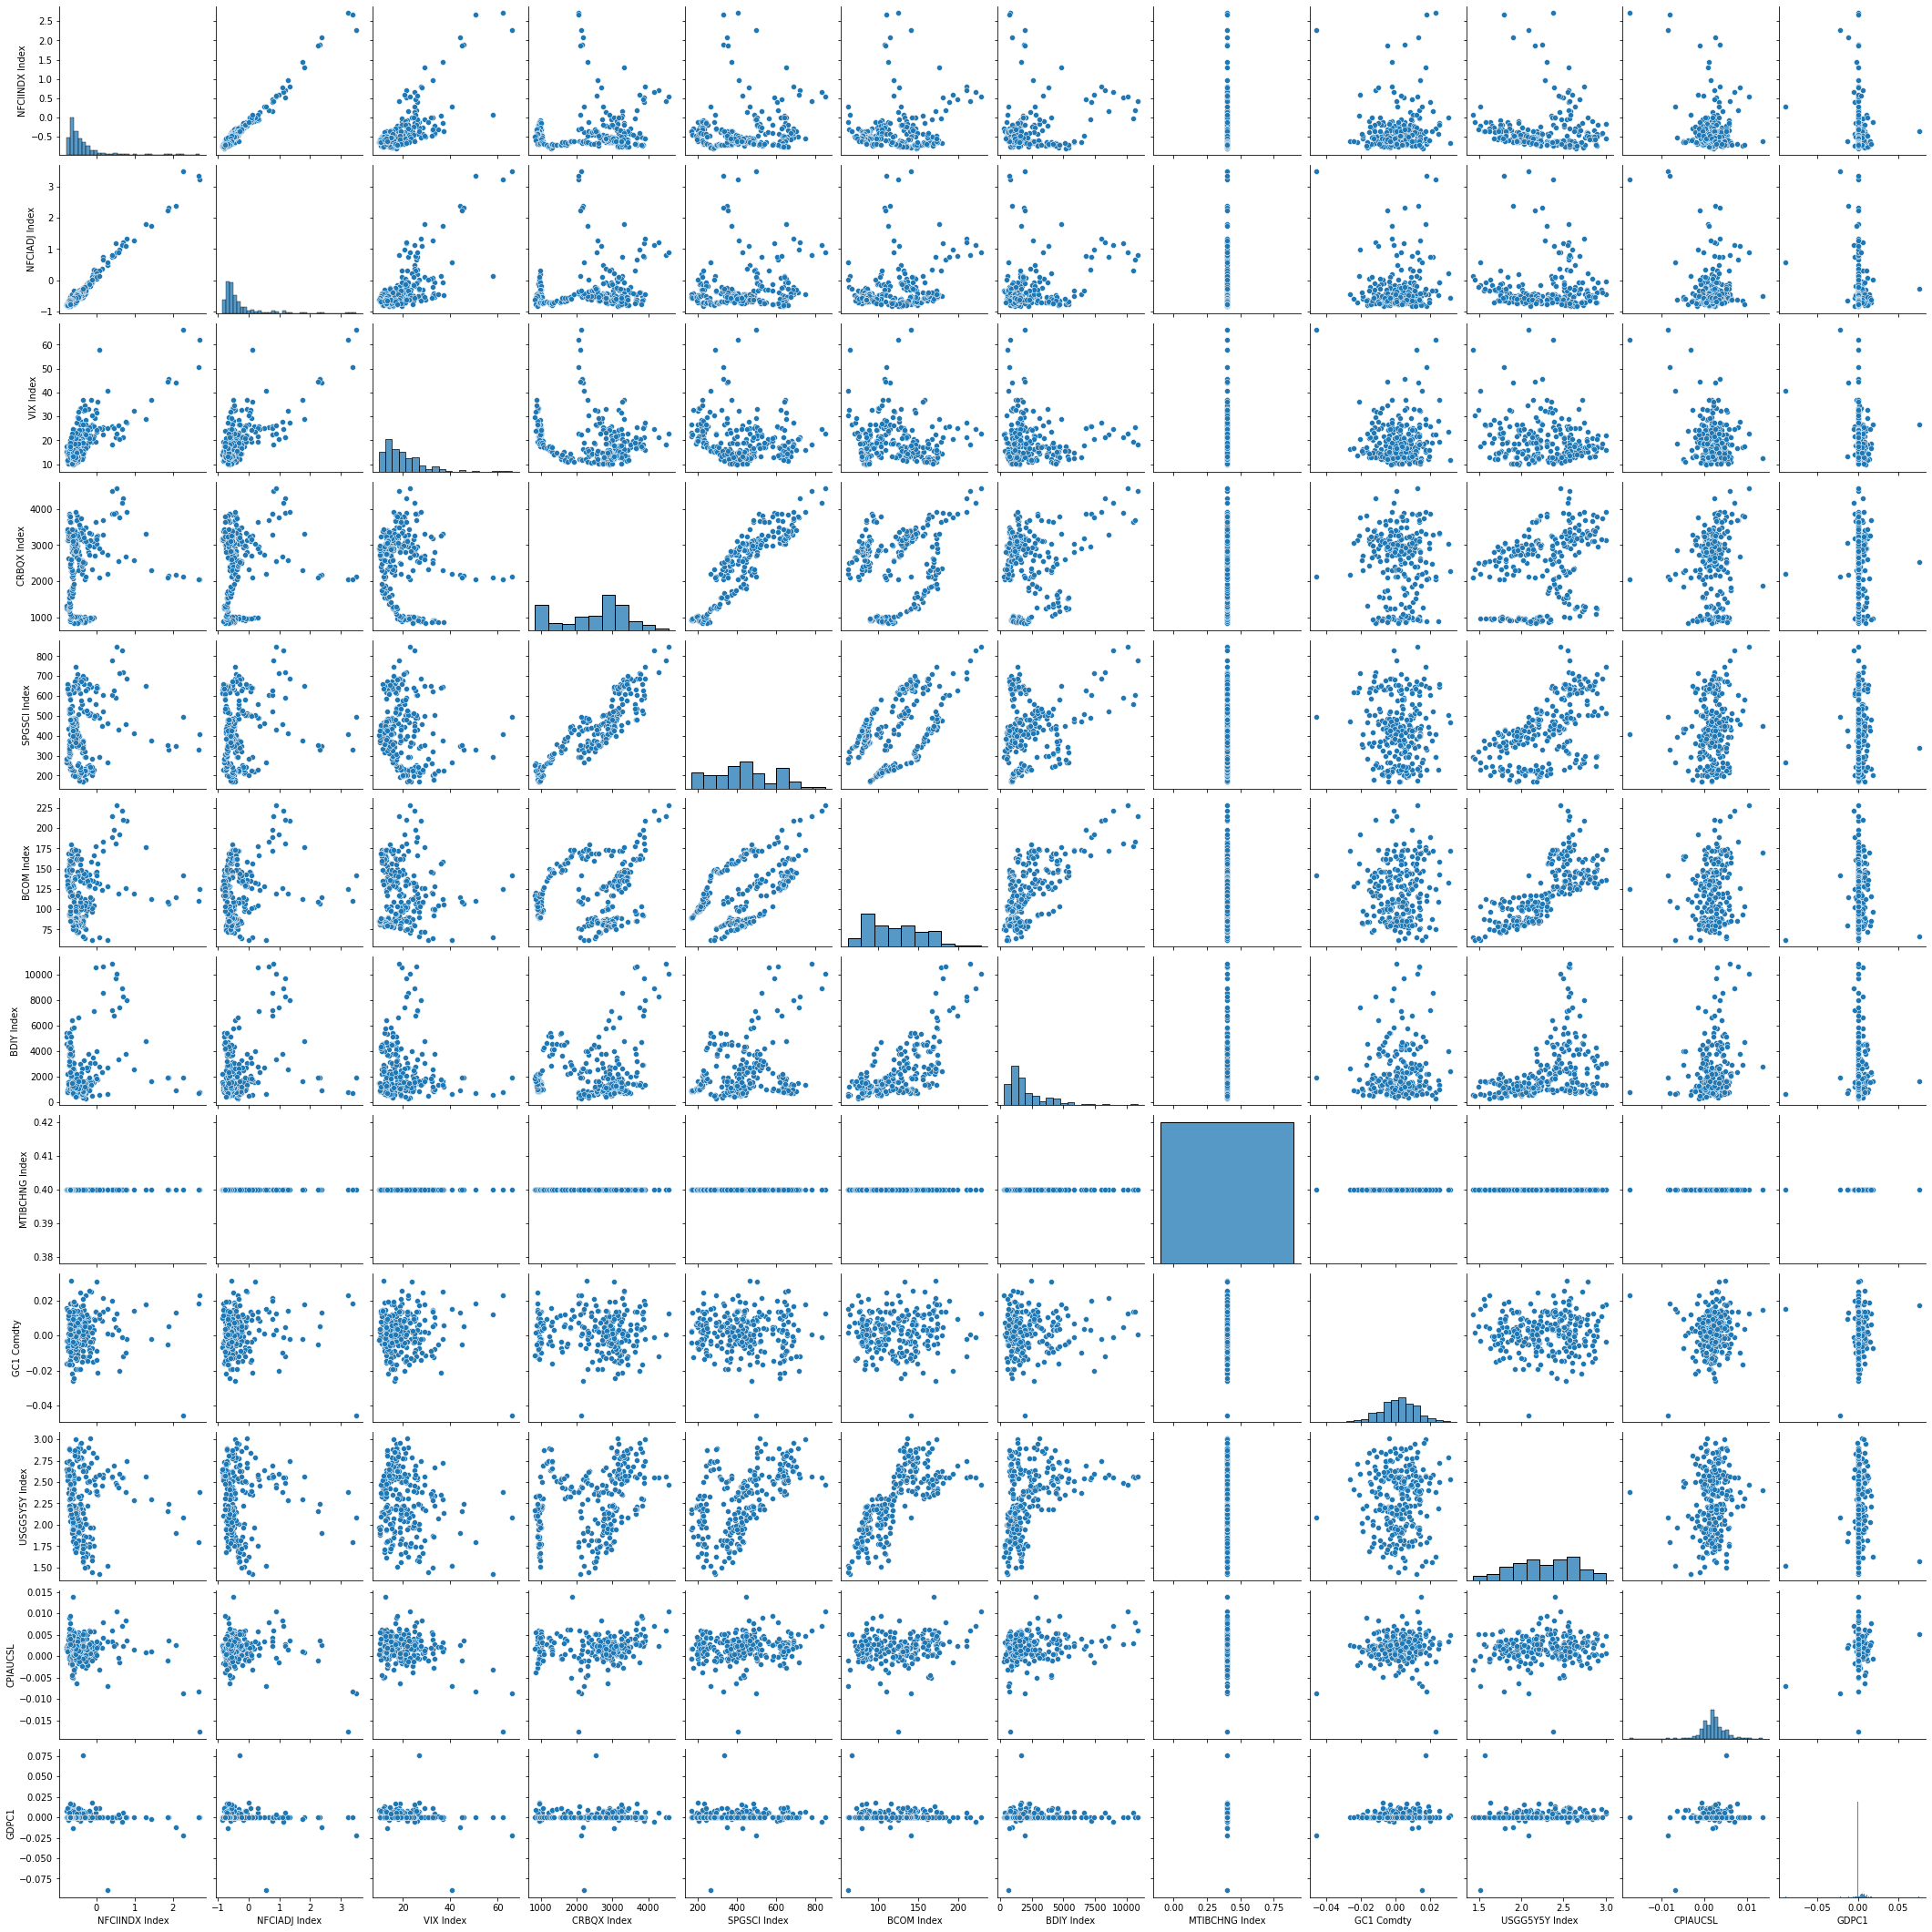

In [23]:
sns.pairplot(cor_gdp_cpi)

In [24]:
#data starts in 2012-02-01, ends in 2021-10-01

cor_gdp_cpi_usd_sp500 = pd.concat([X_data, gdp, cpi, usd, sp500], axis = 1).dropna()

In [25]:
cor_gdp_cpi_usd_sp500

,NFCIINDX Index,NFCIADJ Index,VIX Index,CRBQX Index,SPGSCI Index,BCOM Index,BDIY Index,MTIBCHNG Index,GC1 Comdty,USGG5Y5Y Index,GDPC1,CPIAUCSL,USD,SP500
2000-11-01,-0.188563,-0.200464,25.7525,937.9000,251.905925,109.103925,1727.75,0.4,0.002172,1.859700,0.000000,0.001725,-0.009604,-0.006388
2000-12-01,-0.106176,-0.077797,26.1680,974.1900,244.827500,112.322100,1612.80,0.4,0.005150,1.581420,0.000000,0.002296,-0.003128,-0.000757
2001-02-01,-0.293923,-0.314374,23.3275,1010.6600,234.163475,112.553725,1477.00,0.4,-0.001766,1.775325,0.000000,0.002278,-0.007690,0.006992
2001-03-01,-0.268872,-0.308956,28.4100,974.1040,219.191120,108.444400,1496.60,0.4,-0.001928,1.671480,0.000000,0.000568,-0.006339,0.001208
2001-05-01,-0.414541,-0.443358,22.3200,1008.3350,223.020075,108.829750,1452.75,0.4,0.013600,2.313075,0.000000,0.005102,-0.004226,0.014510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,-0.661411,-0.618283,21.2900,3646.9550,483.190925,85.117425,2062.00,0.4,0.000588,2.130100,0.000000,0.006202,0.001694,0.023522
2021-04-01,-0.693997,-0.636994,16.9000,3683.6075,482.000900,85.697775,2332.50,0.4,0.006434,2.208950,0.016407,0.007700,-0.003100,0.010712
2021-06-01,-0.721153,-0.664539,17.0975,3827.8125,528.940450,93.261200,2942.00,0.4,-0.016660,2.224100,0.000000,0.009049,-0.001933,-0.000904
2021-07-01,-0.712371,-0.714277,17.0280,3687.5340,535.000320,94.973320,3223.00,0.4,0.004046,2.180780,0.005219,0.004738,0.001763,0.005176


### Correlation Analysis 

data starts in 2012-02-01, ends in 2021-10-01

In [26]:
cor_gdp_cpi_usd_sp500.corr()

,NFCIINDX Index,NFCIADJ Index,VIX Index,CRBQX Index,SPGSCI Index,BCOM Index,BDIY Index,MTIBCHNG Index,GC1 Comdty,USGG5Y5Y Index,GDPC1,CPIAUCSL,USD,SP500
NFCIINDX Index,1.000000,0.985696,0.750553,0.114872,0.124922,0.135059,0.180130,NaN,-0.100921,-0.080549,-0.203832,-0.296746,0.101800,-0.266500
NFCIADJ Index,0.985696,1.000000,0.708964,0.160921,0.179955,0.227399,0.275494,NaN,-0.113843,-0.018684,-0.215641,-0.254429,0.127455,-0.255185
VIX Index,0.750553,0.708964,1.000000,-0.155019,-0.137152,-0.090671,-0.028977,NaN,-0.090381,-0.199210,-0.214688,-0.316612,-0.028944,-0.294090
CRBQX Index,0.114872,0.160921,-0.155019,1.000000,0.878623,0.188398,0.146811,NaN,-0.131019,0.273982,0.009878,0.159746,0.262393,0.016202
SPGSCI Index,0.124922,0.179955,-0.137152,0.878623,1.000000,0.524295,0.219941,NaN,-0.166075,0.575055,0.015096,0.132642,0.271073,0.020628
BCOM Index,0.135059,0.227399,-0.090671,0.188398,0.524295,1.000000,0.675234,NaN,-0.033709,0.756919,0.000542,0.152970,0.163452,0.082062
BDIY Index,0.180130,0.275494,-0.028977,0.146811,0.219941,0.675234,1.000000,NaN,0.012881,0.381394,0.038022,0.247994,0.164785,0.137201
MTIBCHNG Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC1 Comdty,-0.100921,-0.113843,-0.090381,-0.131019,-0.166075,-0.033709,0.012881,NaN,1.000000,-0.040581,0.084029,0.121745,-0.107658,-0.091596
USGG5Y5Y Index,-0.080549,-0.018684,-0.199210,0.273982,0.575055,0.756919,0.381394,NaN,-0.040581,1.000000,0.069378,0.135891,0.113989,0.149475


### Heat Map Matrix presenting correlation between indeces + GDP + CPI + USD + SP500

<AxesSubplot:>

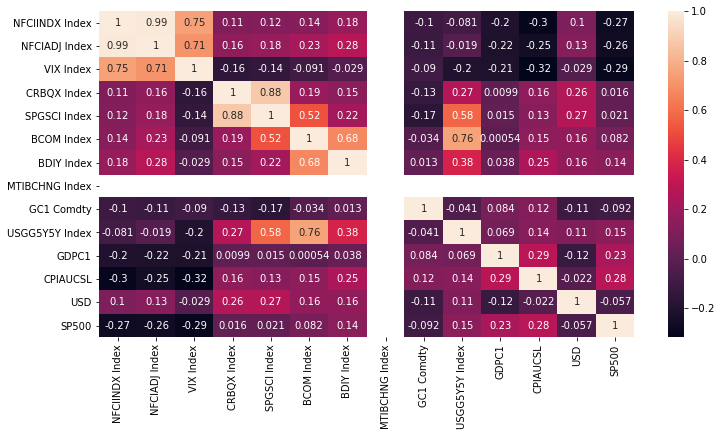

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_gdp_cpi_usd_sp500.corr(), annot=True)

#### By plotting heatmap of correlations between indices, GDP, CPI, USD, and S&P500 we can find again many variables have high correlation (>=0.5) between each other:
##### VIX and NFCIINDEX (0.58), 
##### VIX and NFCIADJ (0.56),
##### BCOM and USGG5Y5Y (0.92),
##### SPGSCI and USGG5Y5Y (0.94),
##### CRBQX and USGG5Y5Y (0.69), 
##### BDIY and CRBQX (0.56), 
##### CPI and BDIY (0.51),
##### CRBQX and NFCIINDX (-0.64),
##### CRBQX and NFCIADJ (-0.53),
##### excluding commodity indexes that of course are correlated. 
##### However, again most variables have low and medium correlation with GDP, CPI, USD and S&P500. 
##### S&P500 have a medium correlation between with GDP (0.41), CPI (0.47).

In [28]:
#sns.pairplot(cor_gdp_cpi_usd_sp500)

Scatter plot CPI and NFCIINDX

[]

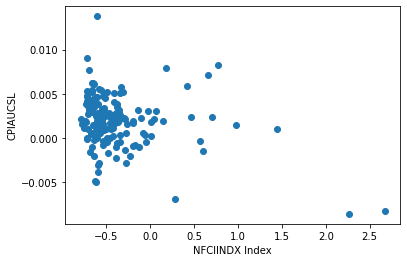

In [29]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['NFCIINDX Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('NFCIINDX Index')
plt.plot()

Scatter plot GDP and NFCIINDX

[]

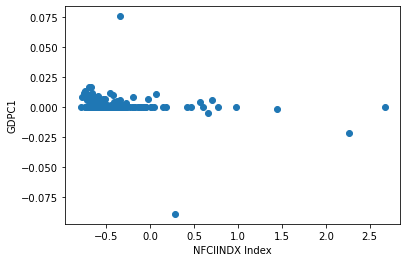

In [30]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['NFCIINDX Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('NFCIINDX Index')
plt.plot()

Scatter plot CPI and NFCIADJ

[]

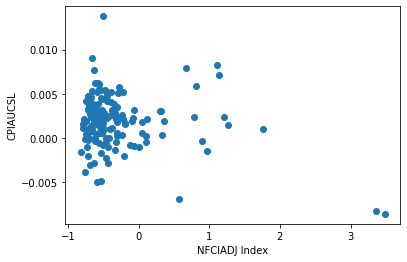

In [31]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['NFCIADJ Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('NFCIADJ Index')
plt.plot()

Scatter plot GDP and NFCIADJ

[]

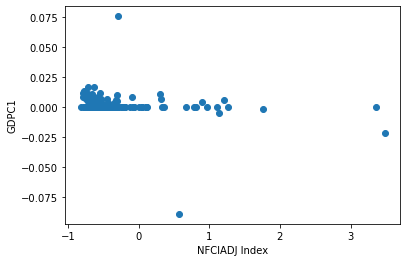

In [32]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['NFCIADJ Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('NFCIADJ Index')
plt.plot()

Scatter plot CPI and VIX

[]

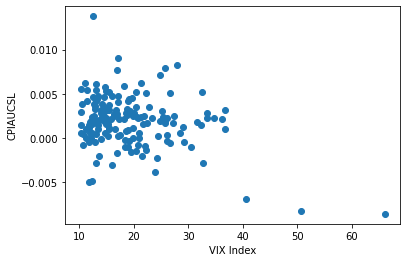

In [33]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['VIX Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('VIX Index')
plt.plot()

Scatter plot GDP and VIX

[]

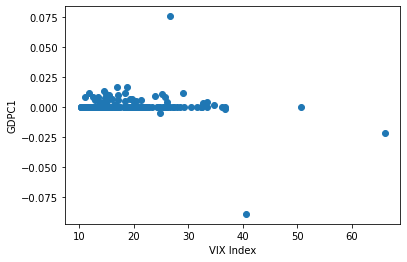

In [34]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['VIX Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('VIX Index')
plt.plot()

Scatter plot CPI and CRBQX

[]

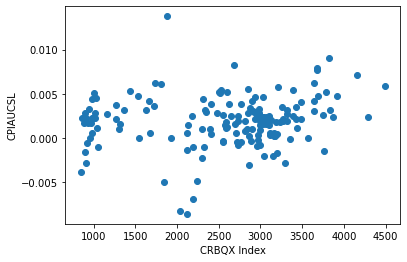

In [35]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['CRBQX Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('CRBQX Index')
plt.plot()

Scatter plot GDP and CRBQX

[]

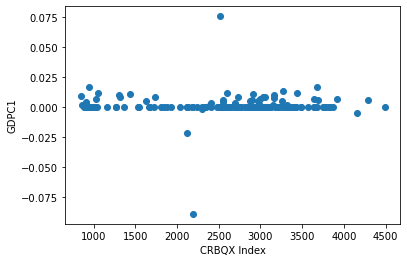

In [36]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['CRBQX Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('CRBQX Index')
plt.plot()

Scatter plot CPI and SPGSCI

[]

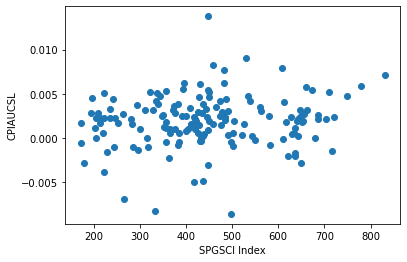

In [37]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['SPGSCI Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('SPGSCI Index')
plt.plot()

Scatter plot GDP and SPGSCI

[]

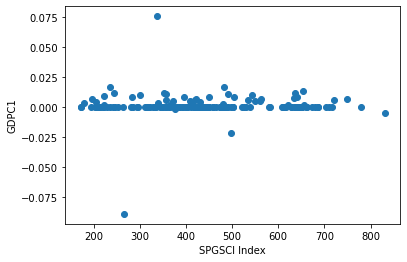

In [38]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['SPGSCI Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('SPGSCI Index')
plt.plot()

Scatter plot CPI and BCOM

[]

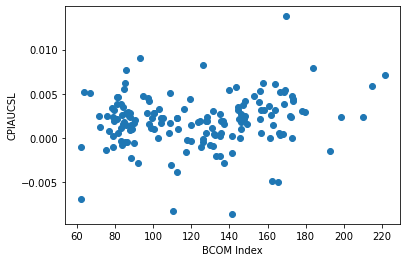

In [39]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['BCOM Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('BCOM Index')
plt.plot()

Scatter plot GDP and BCOM

[]

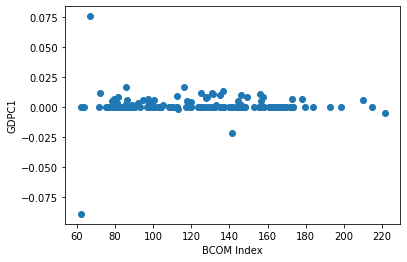

In [40]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['BCOM Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('BCOM Index')
plt.plot()

Scatter plot CPI and BDIY

[]

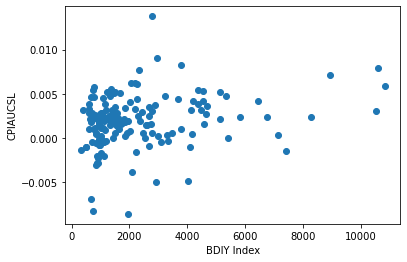

In [41]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['BDIY Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('BDIY Index')
plt.plot()

Scatter plot GDP and BDIY

[]

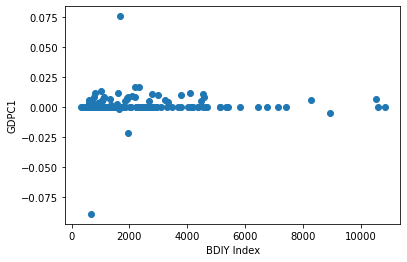

In [42]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['BDIY Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('BDIY Index')
plt.plot()

Scatter plot CPI and MTIBCHNG

[]

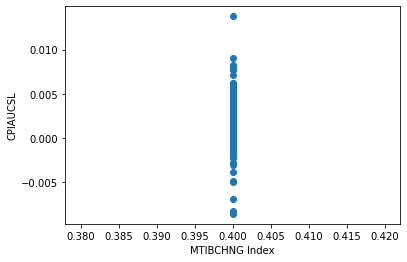

In [43]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['MTIBCHNG Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('MTIBCHNG Index')
plt.plot()

Scatter plot GDP and MTIBCHNG

[]

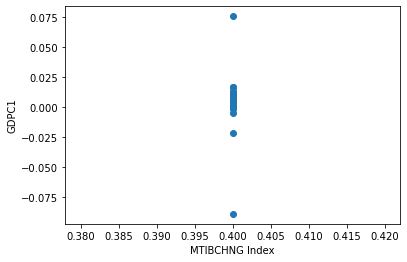

In [44]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['MTIBCHNG Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('MTIBCHNG Index')
plt.plot()

Scatter plot CPI and GC1

[]

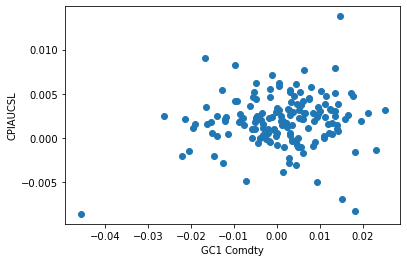

In [45]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['GC1 Comdty'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('GC1 Comdty')
plt.plot()

Scatter plot GDP and GC1

[]

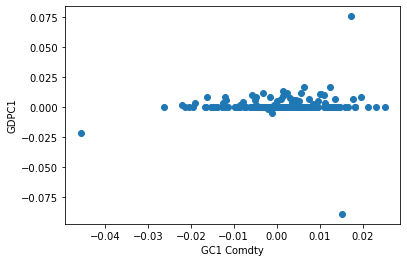

In [46]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['GC1 Comdty'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('GC1 Comdty')
plt.plot()

Scatter plot CPI and USGG5Y5Y

[]

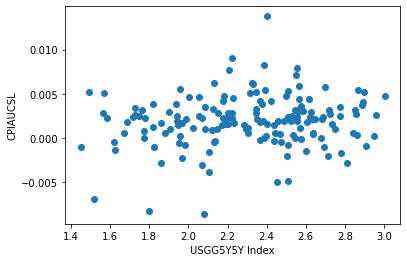

In [47]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['USGG5Y5Y Index'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('USGG5Y5Y Index')
plt.plot()

Scatter plot GDP and USGG5Y5Y

[]

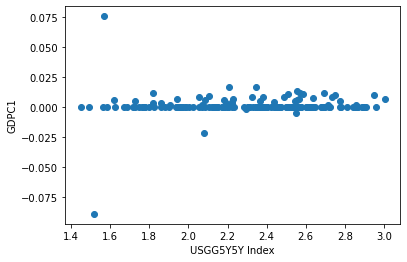

In [48]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['USGG5Y5Y Index'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('USGG5Y5Y Index')
plt.plot()

Scatter plot CPI and USD

[]

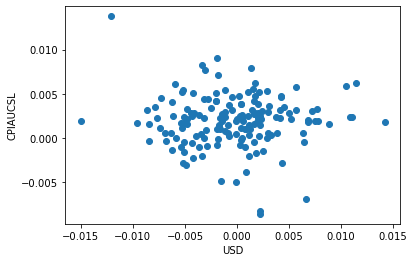

In [49]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['USD'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('USD')
plt.plot()

Scatter plot GDP and USD

[]

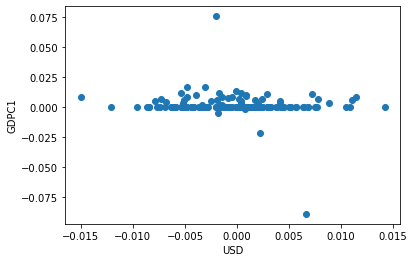

In [50]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['USD'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('USD')
plt.plot()

Scatter plot CPI and SP500

[]

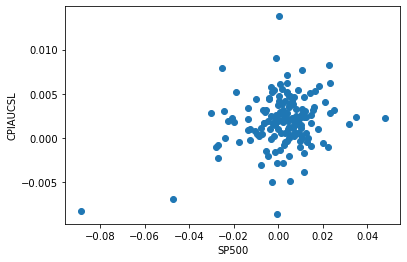

In [51]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['SP500'], cor_gdp_cpi_usd_sp500['CPIAUCSL'])
plt.ylabel('CPIAUCSL')
plt.xlabel('SP500')
plt.plot()

Scatter plot GDP and SP500

[]

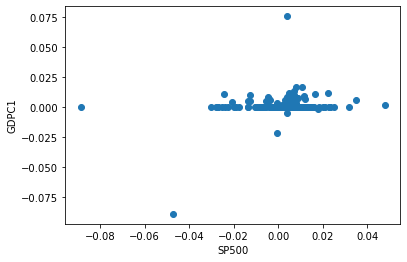

In [52]:
plt.figure()
plt.scatter(cor_gdp_cpi_usd_sp500['SP500'], cor_gdp_cpi_usd_sp500['GDPC1'])
plt.ylabel('GDPC1')
plt.xlabel('SP500')
plt.plot()

In [53]:
sp500 = pdr.get_data_fred('SP500', start='2000-01-01', end='2021-10-01').pct_change()
sp500.fillna(method='bfill', inplace=True)
sp500

,SP500
DATE,
2011-12-05,0.001106
2011-12-06,0.001106
2011-12-07,0.002018
2011-12-08,-0.021142
2011-12-09,0.016883
...,...
2021-09-27,-0.002776
2021-09-28,-0.020364
2021-09-29,0.001569


In [54]:
cpi_gdp_sp500 = pd.concat([cpi, gdp,sp500], axis = 1).dropna()
cpi_gdp_sp500 

,CPIAUCSL,GDPC1,SP500
2012-02-01,0.002137,0.000000,0.008900
2012-03-01,0.002093,0.000000,0.006158
2012-05-01,-0.002068,0.000000,0.005658
2012-06-01,-0.000826,0.000000,-0.024643
2012-08-01,0.005810,0.000000,-0.003030
...,...,...,...
2021-04-01,0.007700,0.016407,0.011825
2021-06-01,0.009049,0.000000,-0.000492
2021-07-01,0.004738,0.005219,0.005222
2021-09-01,0.004124,0.000000,0.000312


In [55]:
cpi_gdp = cpi_gdp_sp500.drop(columns='SP500')
cpi_gdp

,CPIAUCSL,GDPC1
2012-02-01,0.002137,0.000000
2012-03-01,0.002093,0.000000
2012-05-01,-0.002068,0.000000
2012-06-01,-0.000826,0.000000
2012-08-01,0.005810,0.000000
...,...,...
2021-04-01,0.007700,0.016407
2021-06-01,0.009049,0.000000
2021-07-01,0.004738,0.005219
2021-09-01,0.004124,0.000000


In [56]:
sp500 = cpi_gdp_sp500.drop(columns=['CPIAUCSL','GDPC1'])
sp500

,SP500
2012-02-01,0.008900
2012-03-01,0.006158
2012-05-01,0.005658
2012-06-01,-0.024643
2012-08-01,-0.003030
...,...
2021-04-01,0.011825
2021-06-01,-0.000492
2021-07-01,0.005222
2021-09-01,0.000312


#### Regression SP500 on CPI and GDP 

In [57]:
mod = sm.OLS(sp500, cpi_gdp)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  SP500   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.275
Method:                 Least Squares   F-statistic:                              16.74
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                    8.20e-07
Time:                        14:41:19   Log-Likelihood:                          275.61
No. Observations:                  83   AIC:                                     -547.2
Df Residuals:                      81   BIC:                                     -542.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# State Analysis

In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Classification Problem

The general idea is to let the machine find a solution for the classification of states, where the economy is in. 

### Variable Description

A first look onto the different important predictor variables

In [59]:
sp500 = yf.download('SP=F')['Adj Close'].pct_change()
sp500.name = 'SP500'
sp500.fillna(method='ffill', inplace=True)

[*********************100%***********************]  1 of 1 completed


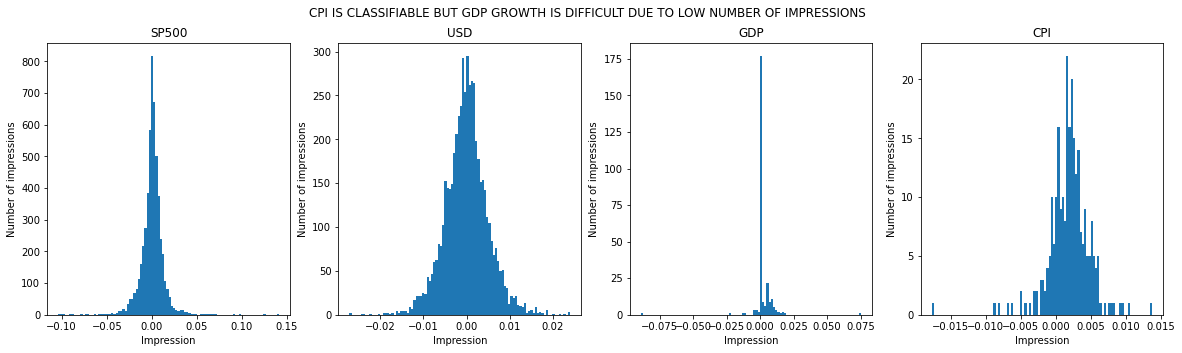

In [60]:
def histoplots(data, title, column):
    ax[column].hist(data, bins=100)
    ax[column].set_title(title)
    ax[column].set_ylabel('Number of impressions')
    ax[column].set_xlabel('Impression')

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# SP500
histoplots(sp500, 'SP500', 0)
# DOLLAR
histoplots(usd, 'USD', 1)
# GDP
histoplots(gdp, 'GDP', 2)
# INFLATION
histoplots(cpi, 'CPI', 3)
_ = plt.suptitle('CPI IS CLASSIFIABLE BUT GDP GROWTH IS DIFFICULT DUE TO LOW NUMBER OF IMPRESSIONS')
plt.show()


And basic statistics of those individual variables

In [61]:
endo = pd.concat([sp500, usd, gdp, cpi], axis = 1, keys = ['SP500', 'USD', 'GDP', 'CPI'])
endo.describe()

,SP500,USD,GDP,CPI
count,5311.000000,5422.000000,261.000000,261.000000
mean,0.000282,-0.000008,0.001604,0.001889
std,0.012383,0.004997,0.008409,0.003015
min,-0.103750,-0.027077,-0.089373,-0.017705
25%,-0.004453,-0.002887,0.000000,0.000502
50%,0.000676,0.000000,0.000000,0.001965
75%,0.005642,0.002780,0.002456,0.003333
max,0.141077,0.023929,0.075475,0.013768


Is there something visual to see?

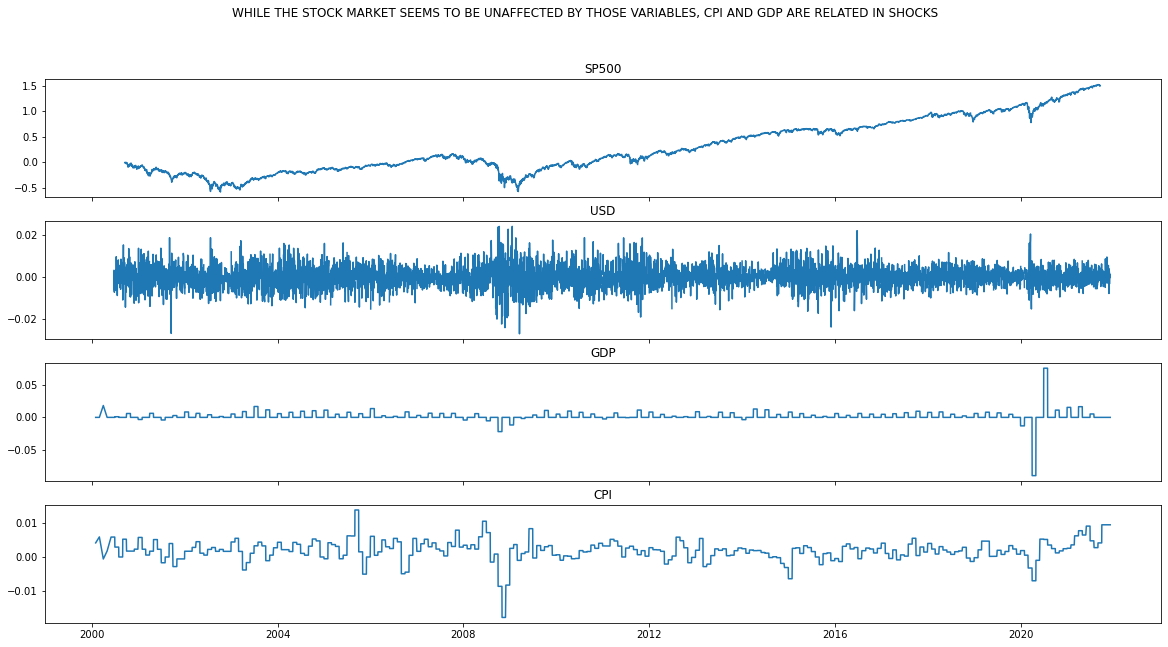

In [62]:
fig, ax = plt.subplots(4, figsize=(20, 10), sharex = True)
ax[0].plot(endo['SP500'].cumsum())
ax[0].set_title('SP500')
ax[1].plot(endo['USD'])
ax[1].set_title('USD')
ax[2].plot(endo['GDP'].ffill())
ax[2].set_title('GDP')
ax[3].plot(endo['CPI'].ffill())
ax[3].set_title('CPI')
_ = plt.suptitle('WHILE THE STOCK MARKET SEEMS TO BE UNAFFECTED BY THOSE VARIABLES, CPI AND GDP ARE RELATED IN SHOCKS')

Notice the compression of dollar volatility!

---

### Creating Classification

In [63]:
endo_class = endo.copy()
endo_class['SP500'] = endo['SP500'].apply(lambda x: 1 if x >= endo['SP500'].mean() else -1)
endo_class['USD'] = endo['USD'].apply(lambda x: 1 if x >= endo['USD'].mean() else -1)
endo_class['GDP'] = endo['GDP'].apply(lambda x: 1 if x >= endo['GDP'].mean() else (-1 if x < endo['GDP'].mean() else np.nan))
endo_class['CPI'] = endo['CPI'].apply(lambda x: 1 if x >= endo['CPI'].mean() else (-1 if x < endo['CPI'].mean() else np.nan))


In [64]:
endo_class.ffill(inplace=True)
endo_class.dropna(inplace=True)

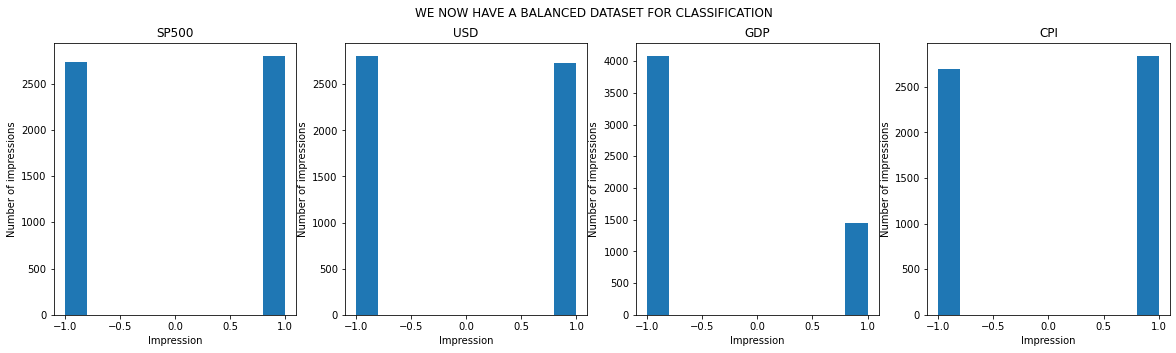

In [65]:
def histoplots(data, title, column):
    ax[column].hist(data, bins=10)
    ax[column].set_title(title)
    ax[column].set_ylabel('Number of impressions')
    ax[column].set_xlabel('Impression')
    
    
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# SP500
histoplots(endo_class['SP500'], 'SP500', 0)
# DOLLAR
histoplots(endo_class['USD'], 'USD', 1)
# GDP
histoplots(endo_class['GDP'], 'GDP', 2)
# INFLATION
histoplots(endo_class['CPI'], 'CPI', 3)
_ = plt.suptitle('WE NOW HAVE A BALANCED DATASET FOR CLASSIFICATION')
plt.show()


---

### Applying Machine Learning

In [66]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [67]:
def test(X, y, model):
    tscv = TimeSeriesSplit()
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

        

Logistic Regression

In [68]:
test(endo_class[['USD', 'GDP', 'CPI']].values, endo_class['SP500'].values, LogisticRegression(random_state=0))

              precision    recall  f1-score   support

          -1       0.53      0.40      0.46       455
           1       0.53      0.66      0.59       467

    accuracy                           0.53       922
   macro avg       0.53      0.53      0.52       922
weighted avg       0.53      0.53      0.52       922



Decision Tree

In [69]:
test(endo_class[['USD', 'GDP', 'CPI']].values, endo_class['SP500'].values, DecisionTreeClassifier(random_state=0))

              precision    recall  f1-score   support

          -1       0.55      0.43      0.48       455
           1       0.54      0.65      0.59       467

    accuracy                           0.54       922
   macro avg       0.55      0.54      0.54       922
weighted avg       0.55      0.54      0.54       922



Random Forest

In [70]:
test(endo_class[['USD', 'GDP', 'CPI']].values, endo_class['SP500'].values, RandomForestClassifier(max_depth=10, random_state=0))

              precision    recall  f1-score   support

          -1       0.55      0.43      0.48       455
           1       0.54      0.65      0.59       467

    accuracy                           0.54       922
   macro avg       0.55      0.54      0.54       922
weighted avg       0.55      0.54      0.54       922



---

### What if we look at early variables?

With the help of the Macro Team we analysed early variables for the economy

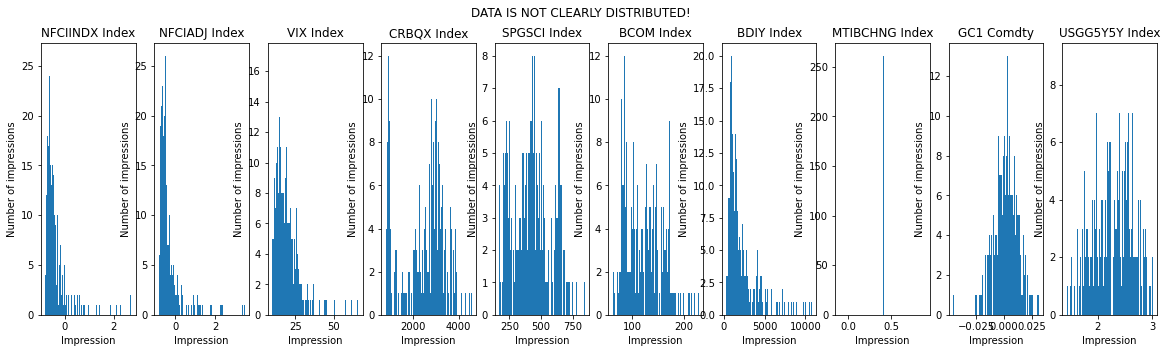

In [71]:
def histoplots(data, title, column):
    ax[column].hist(data, bins=100)
    ax[column].set_title(title)
    ax[column].set_ylabel('Number of impressions')
    ax[column].set_xlabel('Impression')

fig, ax = plt.subplots(1, len(X_data.columns), figsize=(20, 5))
column = 0
for i in X_data.columns:
    histoplots(X_data[i], i, column)
    column += 1
_ = plt.suptitle('DATA IS NOT CLEARLY DISTRIBUTED!')
plt.show()


In [72]:
X = X_data.copy()
for i in X_data.columns:
    X[i] = X_data[i].apply(lambda x: 1 if x >= X_data[i].mean() else (-1 if x < X_data[i].mean() else np.nan))
X = X.ffill()

Creating dummy variables again

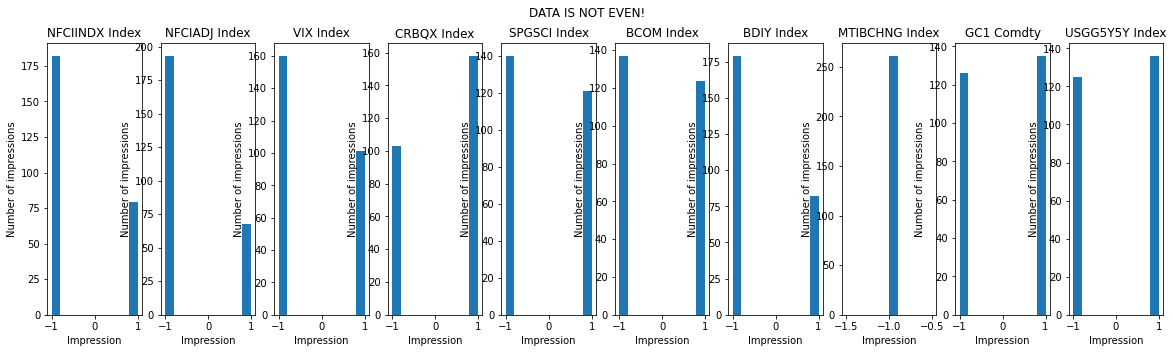

In [73]:
def histoplots(data, title, column):
    ax[column].hist(data, bins=10)
    ax[column].set_title(title)
    ax[column].set_ylabel('Number of impressions')
    ax[column].set_xlabel('Impression')

fig, ax = plt.subplots(1, len(X.columns), figsize=(20, 5))
column = 0
for i in X.columns:
    histoplots(X[i], i, column)
    column += 1
_ = plt.suptitle('DATA IS NOT EVEN!')
plt.show()

In [74]:
X.drop('MTIBCHNG Index', axis = 1, inplace=True)

---

### Applying Machine Learning

Decision Tree

In [75]:
test(X.values, endo_class['SP500'].values, DecisionTreeClassifier(random_state=0))

              precision    recall  f1-score   support

          -1       0.50      0.64      0.56        22
           1       0.47      0.33      0.39        21

    accuracy                           0.49        43
   macro avg       0.48      0.48      0.47        43
weighted avg       0.48      0.49      0.48        43



Random Forest

In [76]:
test(X.values, endo_class['SP500'].values, RandomForestClassifier(random_state=0))

              precision    recall  f1-score   support

          -1       0.50      0.64      0.56        22
           1       0.47      0.33      0.39        21

    accuracy                           0.49        43
   macro avg       0.48      0.48      0.47        43
weighted avg       0.48      0.49      0.48        43



---

**What do we learn?**

For someday in the future:
- Insert dollar volatility as a feature
- Fix the dataset imbalance
- Look for more early features
- Use regression instead of classification

# THANK YOU : )